In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations
%matplotlib inline
import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


### Problem 1

###  A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected

In [6]:
data={"Striker":[45,32], 'Forward':[56,38],'Attacking_Midfielder':[24,11],'Winger':[20,9]}
player_data=pd.DataFrame(data=data, index=['Players_Injured','Players_not_Injured'])
player_data['sum']=player_data.sum(axis=1)
player_data.loc['total'] = player_data.iloc[:, :].sum()
player_data


,Striker,Forward,Attacking_Midfielder,Winger,sum
Players_Injured,45,56,24,20,145
Players_not_Injured,32,38,11,9,90
total,77,94,35,29,235


### 1.1 What is the probability that a randomly chosen player would suffer an injury?


In [29]:
#prob_injured=Total numbers of players injured/Total numbers of players

prob_injured=player_data.iloc[0,4]/player_data['sum'].sum()

print("The probability that a randomly chosen player would suffer an injury is {}%". format(round(prob_injured*100,2)))


The probability that a randomly chosen player would suffer an injury is 61.7%


### 1.2 What is the probability that a player is a forward or a winger?


In [38]:
#This will be sum of two probabilities i.e. either a forward or a winger
prob_forward_winger=(player_data['Forward'].sum()+player_data['Winger'].sum())/player_data['sum'].sum()

print("The probability that a player is a forward or a winger is {}%". format(round(prob_forward_winger*100,2)))

The probability that a player is a forward or a winger is 52.34%


### 1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [44]:
#This calls for a marginal probability of a randomly chosen player being both a striker and having an injury

prob_striker_footinjury=player_data.loc['Players_Injured','Striker']/player_data['sum'].sum()

print("The probability that a randomly chosen player plays in a striker position and has a foot injury is {}%". format(round(prob_striker_footinjury*100,2)))

The probability that a randomly chosen player plays in a striker position and has a foot injury is 19.15%



### 1.4 What is the probability that a randomly chosen injured player is a striker?

In [9]:
#This calls for probability that a randomly chosen player is striker given that he is injured.

prob_injured=player_data.iloc[0,4]/player_data['sum'].sum()#probability that a randomly selected player is injured
prob_striker=player_data['Striker'].sum()/player_data['sum'].sum()#probability that a randomly selected player is striker
prob_striker_injured=prob_injured*prob_striker #Joint probability that a randomly selected player is both a striker and also injured

prob_striker_given_injured=(prob_striker_injured)/prob_injured# Probability that the randomly selected player is a striker given that he is injured

print("The probability that a randomly chosen injured player is a striker is {}%". format(round(prob_striker_given_injured*100,2)))


The probability that a randomly chosen injured player is a striker is 32.77%


### 1.5 What is the probability that a randomly chosen injured player is either a forward or an attacking midfielder? 

In [16]:
# Calculating similarly the probability that a randomly chosen injured player is an attacking midfielder

prob_injured=player_data.iloc[0,4]/player_data['sum'].sum()#probability that a randomly selected player is injured
prob_attacking_midfielder_or_forward=(player_data['Attacking_Midfielder'].sum()+player_data['Forward'].sum())/player_data['sum'].sum()#probability that a randomly selected player is either an attacking midfielder or a striker
prob_attacking_midfielder_or_forward_and_injured=prob_injured*prob_attacking_midfielder_or_forward #Joint probability that a randomly selected player is either a striker or an attacking midfielder and also injured
prob_attacking_midfielder_or_forward_given_injured=(prob_attacking_midfielder_or_forward_and_injured)/prob_injured# Probability that the randomly selected player is a striker or an attackinh midfielder given that he is injured

print("The probability that a randomly chosen injured player is either a forward or an attacking midfielder is {}%". format(round(prob_attacking_midfielder_or_forward_given_injured*100,2)))


The probability that a randomly chosen injured player is either a forward or an attacking midfielder is 54.89%


### Problem 2




###  An independent research organization is trying to estimate the probability that an accident at a nuclear power plant will result in radiation leakage. The types of accidents possible at the plant are, fire hazards, mechanical failure, or human error. The research organization also knows that two or more types of accidents cannot occur simultaneously.

#### According to the studies carried out by the organization, the probability of a radiation leak in case of a fire is 20%, the probability of a radiation leak in case of a mechanical 50%, and the probability of a radiation leak in case of a human error is 10%. The studies also showed the following;

•	The probability of a radiation leak occurring simultaneously with a fire is 0.1%.
•	The probability of a radiation leak occurring simultaneously with a mechanical failure is 0.15%.
•	The probability of a radiation leak occurring simultaneously with a human error is 0.12%.

On the basis of the information available, answer the questions below:



#### 2.1 What are the probabilities of a fire, a mechanical failure, and a human error respectively?



In [19]:
p_R_given_F=0.2 # Probability of radiation given fire
p_R_given_M=0.5 # Probability of radiation given mechanical error
p_R_given_H=0.10 # Probability of radiation given human error

p_R_and_F=(0.1/100)# Joint probability of radiation and fire
p_R_and_M=(0.15/100)# joint probability of rediation and mechanical error
p_R_and_H=(0.12/100) # joint probability of radiation and human error


p_F=p_R_and_F/p_R_given_F   #p_R_and_F= p_F *p_R_given_F ; p_F being probability of fire
p_M=p_R_and_M/p_R_given_M   # p_R_and_M=p_M*p_R_given_M; p_M being the probability of mechanical error
p_H=p_R_and_H/p_R_given_H  # p_R_and_H=p_H*p_R_given_H;p_H being the probability of human error

print ("The probability of fire is {}%\nThe probability of mechanical error is {}%\nThe probability of human error is {}%\n ".format(p_F*100,p_M*100,p_H*100))

The probability of fire is 0.5%
The probability of mechanical error is 0.3%
The probability of human error is 1.2%
 


#### 2.2 What is the probability of a radiation leak?


In [20]:
p_R=p_F*p_R_given_F+p_M*p_R_given_M+p_H*p_R_given_H
# probability of radiation=probabaility of fire* probability of radiation given fire +probabaility of mechanical error* probability of radiation given mechanical error+probabaility of human error* probability of radiation given human error

print ("The probability of radiation is {}%".format(p_R*100))

The probability of radiation is 0.37%


#### 2.3 Suppose there has been a radiation leak in the reactor for which the definite cause is not known. What is the probability that it has been caused by:
•	A Fire.
•	A Mechanical Failure.
•	A Human Error.

In [21]:
p_F_given_R=(p_R_and_F)/p_R # (probability of fire given radiation=probability of fire* probability of fire and radiation)/probability of radiation
p_M_given_R=(p_R_and_M)/p_R # (probability of mechanical error given radiation=probability of mechanical error* probability of mechanical error and radiation)/probability of radiation
p_H_given_R=(p_R_and_H)/p_R # (probability of human error given radiation=probability of humanl error* probability of human error and radiation)/probability of radiation

print ("Thus given there is a radiation leak,the probability that it has been caused due to a fire,a mechanical error or a human error is {}%,{}%,{}% respectively".format(round(p_F_given_R*100,2),round(p_M_given_R*100,2),round(p_H_given_R*100,2)))

Thus given there is a radiation leak,the probability that it has been caused due to a fire,a mechanical error or a human error is 27.03%,40.54%,32.43% respectively


### Problem 3
**The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)**



### 3.1 What proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm?


In [24]:
# find the cumulative probability
# norm.cdf() calculates the cumulative probability
mu=5
sigma=1.5
a=3.17
prob_less_than_a = stats.norm.cdf(a, mu, sigma)
print(
    "The probability that the gunny bags have a breaking strength less than 3.17 kg per sq cm is{} i.e. is {}%".format(
    round(prob_less_than_a, 4),round(prob_less_than_a*100, 2))
)

The probability that the gunny bags have a breaking strength less than 3.17 kg per sq cm is0.1112 i.e. is 11.12%


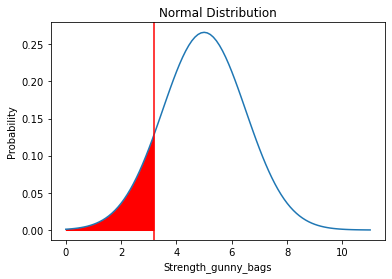

In [122]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
density=pd.DataFrame()
density['x']=np.linspace(0,11,100)
density['pdf']=stats.norm.pdf(density['x'],mu,sigma)
plt.plot(density["x"], density["pdf"]) # plot the pdf of the normal distribution
plt.axvline(x=a, c="r") # draw a red vertical line at x = a
x1 = np.linspace(density["x"].min(), a, 50) # create an array of 50 numbers between min strength and 3.17
plt.fill_between(x1, stats.norm.pdf(x1, mu, sigma), color="r") # fill the specified region with red color
plt.xlabel("Strength_gunny_bags") # set the x-axis label
plt.ylabel("Probability") # set the y-axis label
plt.title("Normal Distribution") # set the title
plt.show() # display the plot


### 3.2 What proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm.?



In [26]:
mu=5
sigma=1.5
a=3.6
prob_more_than_a = 1-stats.norm.cdf(a, mu, sigma)
print(
    "The probability that the gunny bags have a breaking strength at least 3.6 kg per sq cm. is{} i.e. {}%".format(
    round(prob_more_than_a, 4),round(prob_more_than_a*100, 2))
)

The probability that the gunny bags have a breaking strength at least 3.6 kg per sq cm. is0.8247 i.e. 82.47%


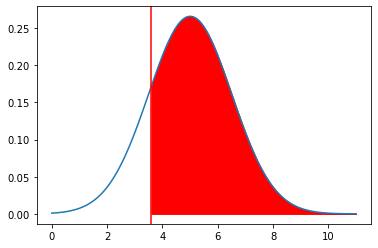

In [127]:
#Plot the probability distribution
density=pd.DataFrame()
x=np.linspace(0,11,100)
density['x']=x
density['pdf']=stats.norm.pdf(density['x'],mu,sigma)
plt.plot(density['x'],density['pdf'])
plt.axvline(x=3.6,c='r')
x1=np.linspace(3.6,x.max(),100)
plt.fill_between(x1,stats.norm.pdf(x1,mu,sigma),color='r')


### 3.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?


In [32]:
a=5
b=5.5

prob_less_than_a=stats.norm.cdf(a,mu,sigma)
prob_less_than_b = stats.norm.cdf(b, mu, sigma)
print(
    "The probability that the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm. is{} i.e. {}%".format(
    round(prob_less_than_b-prob_less_than_a, 4),round((prob_less_than_b-prob_less_than_a)*100,2) )
)

The probability that the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm. is0.1306 i.e. 13.06%


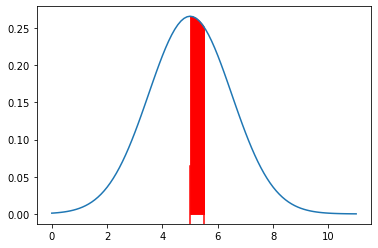

In [139]:
#Plot the probability distribution
density=pd.DataFrame()
x=np.linspace(0,11,100)
density['x']=x
density['pdf']=stats.norm.pdf(density['x'],mu,sigma)
plt.plot(density['x'],density['pdf'])
plt.axvline(x=5,c='r',ymax=stats.norm.pdf(5,mu,sigma))
plt.axvline(x=5.5,c='r',ymax=stats.norm.pdf(5,mu,sigma))
x1=np.linspace(5,5.5,100)
plt.fill_between(x1,stats.norm.pdf(x1,mu,sigma),color='r',)



3.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?
 

In [37]:
a=3
b=7.5

prob_less_than_a=stats.norm.cdf(a,mu,sigma)
prob_more_than_b=1-stats.norm.cdf(b,mu,sigma)

Prob_not_between_a_and_b=prob_less_than_a+prob_more_than_b

print("The proportion of the gunny bags that have a breaking strength NOT between 3 and 7.5 kg per sq cm. is {} of the total population of gunny bags".format(round(Prob_not_between_a_and_b,4)) )

The proportion of the gunny bags that have a breaking strength NOT between 3 and 7.5 kg per sq cm. is 0.139 of the total population of gunny bags


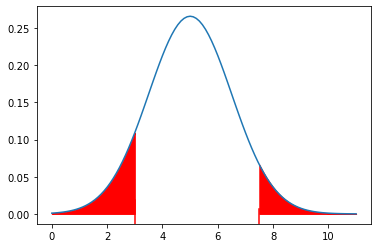

In [143]:
plt.plot(density['x'],density['pdf']);
plt.axvline(x=3,c='r',ymax=stats.norm.pdf(3,mu,sigma))
plt.axvline(x=7.5,c='r',ymax=stats.norm.pdf(7.5,mu,sigma))
x1=np.linspace(x.min(),3,100)
x2=np.linspace(7.5,x.max(),100)
plt.fill_between(x1,stats.norm.pdf(x1,mu,sigma),color='r')
plt.fill_between(x2,stats.norm.pdf(x2,mu,sigma),color='r',)


### Problem 4

### 4.Grades of the final examination in a training course are found to be normally distributed, with a mean of 77 and a standard deviation of 8.5. Based on the given information answer the questions below.
 


### 4.1 What is the probability that a randomly chosen student gets a grade below 85 on this exam?



The probability that a randomly chosen student gets a grade below 85 on this exam is 0.8267 i.e. 82.67%


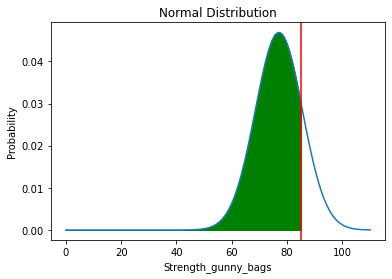

In [39]:
mu=77
sigma=8.5
a=85
prob_less_than_a=stats.norm.cdf(a,mu,sigma)
print(
"The probability that a randomly chosen student gets a grade below 85 on this exam is {} i.e. {}%".format(round(prob_less_than_a,4),round(prob_less_than_a*100,2)))
density=pd.DataFrame()
density['x']=np.linspace(0,110,100)
density['pdf']=stats.norm.pdf(density['x'],mu,sigma)
plt.plot(density["x"], density["pdf"]) # plot the pdf of the normal distribution
plt.axvline(x=a, c="r") # draw a red vertical line at x = a
x1 = np.linspace(density["x"].min(), a, 100) # create an array of 50 numbers between min strength and 3.17
plt.fill_between(x1, stats.norm.pdf(x1, mu, sigma), color="g") # fill the specified region with red color
plt.xlabel("Strength_gunny_bags") # set the x-axis label
plt.ylabel("Probability") # set the y-axis label
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

### 4.2 What is the probability that a randomly selected student scores between 65 and 87?


The probability that a randomly selected student scores between 65 and 87 is 0.8013 i.e 80.13% 


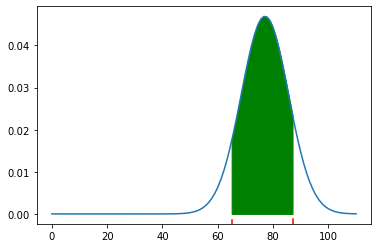

In [40]:
b=65
c=87
prob_less_than_b=stats.norm.cdf(b,mu,sigma)
prob_less_than_c=stats.norm.cdf(c,mu,sigma)
print(
"The probability that a randomly selected student scores between 65 and 87 is {} i.e {}% ".format(round(prob_less_than_c-prob_less_than_b,4),round((prob_less_than_c-prob_less_than_b)*100,2)))
plt.plot(density['x'],density['pdf'])
plt.axvline(x=65,c='r',ymax=stats.norm.pdf(65,mu,sigma))
plt.axvline(x=87,c='r',ymax=stats.norm.pdf(87,mu,sigma))
x1=np.linspace(65,87,100)
plt.fill_between(x1,stats.norm.pdf(x1,mu,sigma),color='g',)

### 4.3 What should be the passing cut-off so that 75% of the students clear the exam?

The passing cut-off so that 75% of the students clear the exam is 71.2668 


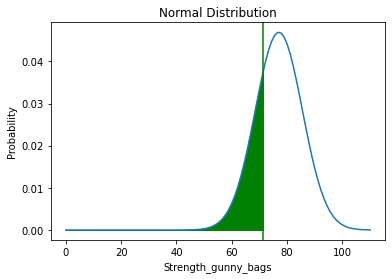

In [41]:
#To decide on a marks so that 75% of the students pass, we have to find out the score above which 75% of the student's score.Thus we need to find the score for which the left tail area is 25%.
marks_cut_off_75_percent=stats.norm.ppf(0.25,mu,sigma)
print(
"The passing cut-off so that 75% of the students clear the exam is {} ".format(round(marks_cut_off_75_percent,4)))

plt.plot(density["x"], density["pdf"]) # plot the pdf of the normal distribution
plt.axvline(x=marks_cut_off_75_percent, c="g") # draw a red vertical line at x = a
x1 = np.linspace(density['x'].min(), marks_cut_off_75_percent, 100) # create an array of 50 numbers between min strength and 3.17
plt.fill_between(x1, stats.norm.pdf(x1, mu, sigma), color="g") # fill the specified region with red color
plt.xlabel("Strength_gunny_bags") # set the x-axis label
plt.ylabel("Probability") # set the y-axis label
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

### Problem 5:
 
### Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);
 


### 5.1 Earlier experience of Zingaro with this particular client is favorable as the stone surface was found to be of adequate hardness. However, Zingaro has reason to believe now that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

In [42]:
stones=pd.read_csv(r"D:\DSBA\The course\14-AS-project\Zingaro_Company.csv")
stones.head()



,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [177]:
stones.shape

(75, 2)

In [224]:
stones.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [202]:
stones.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


In [174]:
stones.isnull().sum()

Unpolished              0
Treated and Polished    0
dtype: int64

### Thus the given data is non-null, void of unusual value and hence can be used for statiscal analysis

### Step 1: Define null and alternative hypotheses¶
Testing whether unpolished stones are suitable for printing?

##### Null hypothesis states that mean hardness,  𝜇  is equals to 150.
##### Alternative hypothesis states that the mean hardness,  𝜇  is unequal to 150.
𝐻0 :  𝜇  = 150
𝐻𝐴 :  𝜇   ≠  150

### Step 2: Decide the significance level¶
 Here we select  𝛼  = 0.05.

### Step 3: Identify the test statistic
We do not know the population standard deviation and n = 75. So we use the t distribution and the  𝑡𝑆𝑇𝐴𝑇  test statistic

### Step 4: Calculate the p - value and test statistic

**scipy.stats.ttest_1samp calculates the t test for the mean of one sample given the sample observations and  the expected value in the null hypothesis. This function returns t statistic and the two-tailed p value.**

In [43]:
from scipy.stats import ttest_1samp
# one sample t-test
# null hypothesis: expected value = 150
result = ttest_1samp(stones.iloc[:,0], 150)
print('One sample t test \nt statistic: {0} p value: {1} '.format(round(result.statistic,4),result.pvalue))


One sample t test 
t statistic: -4.1646 p value: 8.342573994839285e-05 


### Step 5 Decide to reject or accept null hypothesis

In [210]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
print ("Our one-sample t-test p-value=", p_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 



Level of significance: 0.05
Our one-sample t-test p-value= 8.342573994839285e-05
We have evidence to reject the null hypothesis since p value < Level of significance


In this example, p value is 8.342573994839285e-05 and it is significantly lesserer than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So at 95% confidence level, there is  sufficient evidence  to prove that the hardness of unpolished stones in the sample received is significantly different from  the optimum hardness of 150 and hence may not be suitable for printing


## 5.2 Is the mean hardness of the polished and unpolished stones the same?


### Step 1: Define the Null and alternate Hypothesis:

   Null hypothesis states that mean hardness is same for both polished(𝜇1) and unpolished(𝜇2)  stone samples
   Alternative hypothesis states that the mean hardness is different between polished(𝜇1)  and unpolished (𝜇2) stone samples
   𝐻0 : 𝜇1 =  𝜇2
   𝐻𝐴 : 𝜇1 ≠ 𝜇2

### Step 2: Define level of significance

   Level of significance is 95%\
   p_val_sig=0.05

### Step 3: Select the correct statistical test

For this purpose two sample t-test using independent sample can be used as the population variance is unknown & both the samples are of the same size

### Step 4 :Calculate the test statistics and p-value

In [123]:
from scipy.stats import ttest_ind

result=ttest_ind(stones.iloc[:,0],stones.iloc[:,1])
result



Ttest_indResult(statistic=-3.242232050141406, pvalue=0.001465515019462831)

### Step 5 Decide to reject or accept null hypothesis

In [264]:
if result.pvalue>0.05:
    print("At 95% level of significance, there is no significant difference between the mean hardness of polished and unpolished stone and hence the null hypothesis can't be rejected.")
else :
    print("At 95% level of significance, there is significant difference between the mean hardness of polished and unpolished stone and hence the null hypothesis is rejected.")

At 95% level of significance, there is significant difference between the mean hardness of polished and unpolished stone and hence the null hypothesis is rejected.


### Problem 6:
 
#### Aquarius health club, one of the largest and most popular cross-fit gyms in the country has been advertising a rigorous program for body conditioning. The program is considered successful if the candidate is able to do more than 5 push-ups, as compared to when he/she enrolled in the program. Using the sample data provided can you conclude whether the program is successful? (Consider the level of Significance as 5%)

Note that this is a problem of the paired-t-test. Since the claim is that the training will make a difference of more than 5, the null and alternative hypotheses must be formed accordingly.


### Step 1: State the null and alternate hypothesis

Null hypothesis states that there is no difference between the mean numbers of push ups made \
by a candidate before(𝜇1) and after enrolling for the program(𝜇2)\
i.e. 𝜇1=𝜇2 \
Alternative hypothesis is that there is significant difference between the mean numbers of push ups made\
by a candidate before and after enrolling for the program \
i.e. 𝜇1 ≠ 𝜇2

### Step 2: Decide the level of significance:

   Level of significance is 95%\
   p_val_sig=0.05

### Step 3: Select the correct statistical test

For this purpose two sample t-test using relative sample can be used as the population variance is unknown & both the samples are of the same size

### Step 4 :Calculate the test statistics and p-value

In [269]:
from scipy.stats import ttest_rel

data=pd.read_csv(r"D:\DSBA\The course\14-AS-project\Aquarius_gym.csv")

data.head()

,Sr no.,Before,After
0,1,39,44
1,2,25,25
2,3,39,39
3,4,6,13
4,5,40,44


In [ ]:
data.()

In [273]:
result=ttest_rel(data["Before"],data['After'])
result

Ttest_relResult(statistic=-19.322619811082458, pvalue=2.2920419252511966e-35)

### Step 5 :Calculate the test statistics and p-value

In [274]:
if result.pvalue>0.05:
    print("At 95% level of significance, there is no difference between the mean numbers of push ups made by a candidate before and after enrolling for the program, hence the null hypothesis can't be rejected.")
else :
    print("At 95% level of significance, there is significant difference between the mean numbers of push ups made by a candidate before and after enrolling for the program, hence the null hypothesis is rejected")

At 95% level of significance, there is significant difference between the mean numbers of push ups made by a candidate before and after enrolling for the program, hence the null hypothesis is rejected


### Problem 7:
 
### Dental implant data: The hardness of metal implant in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as on the dentists who may favour one method above another and may work better in his/her favourite method. The response is the variable of interest.





### 1.	Test whether there is any difference among the dentists on the implant hardness. State the null and alternative hypotheses. Note that both types of alloys cannot be considered together. You must state the null and alternative hypotheses separately for the two types of alloys.?

In [50]:
dental=pd.read_excel(r"D:\DSBA\The course\14-AS-project\Dental Hardness data.xlsx",sheet_name='Data')
dental.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [51]:
dental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


Thus the original data is without any null value. However, categorical data such as dentist,method,alloy and temp is assumed to be integer which needs to be changed to categorical type

In [54]:
#chaning the integer data type to categorical type
dental['Dentist']=dental['Dentist'].astype('category')
dental['Method']=dental['Method'].astype('category')
dental['Alloy']=dental['Alloy'].astype('category')
dental['Temp']=dental['Temp'].astype('category')#since there are only three available values, it is more of the nature of categorical variable than a continous one

In [53]:
dental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   90 non-null     category
 1   Method    90 non-null     category
 2   Alloy     90 non-null     category
 3   Temp      90 non-null     category
 4   Response  90 non-null     int64   
dtypes: category(4), int64(1)
memory usage: 1.8 KB


In [58]:
dental.Alloy.value_counts()

1    45
2    45
Name: Alloy, dtype: int64

In [88]:
#since both the types of alloys can not be used together and as per the requirement of analysing  for two different alloy types separately, segregating the sample based on types of alloys used
dental_alloy1=dental[dental.Alloy==1]
dental_alloy2=dental[dental.Alloy==2]
 

In [56]:
dental_alloy1.Dentist.value_counts()

1    9
2    9
3    9
4    9
5    9
Name: Dentist, dtype: int64

In [57]:
dental_alloy2.Dentist.value_counts()

1    9
2    9
3    9
4    9
5    9
Name: Dentist, dtype: int64

## Postulating the Null and Alternate Hypothesis

### For alloy type 1

$H_0$: The mean implant hardness level for all five dentist are the same  while using alloy type 1

$H_1$: The mean implant hardness level is different for atleast one of the five dentists while using alloy type 1



### For alloy type 2

$H_0$: The mean implant hardness level for all five dentist are the same  while using alloy type 2

$H_1$: The mean implant hardness level is different for atleast one of the five dentists while using alloy type 2



### 2.	Before the hypotheses may be tested, state the required assumptions. Are the assumptions fulfilled? Comment separately on both alloy types.? 

#### There are two assumptions :
 1.that the data was drawn from a normal distribution 
 2.that all input samples are from populations with equal variances
 
### For alloy type 1

In [95]:
dentist_1_alloy1 = dental_alloy1[dental_alloy1['Dentist']==1]['Response']
dentist_2_alloy1 = dental_alloy1[dental_alloy1['Dentist']==2]['Response']
dentist_3_alloy1 = dental_alloy1[dental_alloy1['Dentist']==3]['Response']
dentist_4_alloy1 = dental_alloy1[dental_alloy1['Dentist']==4]['Response']
dentist_5_alloy1 = dental_alloy1[dental_alloy1['Dentist']==5]['Response']


In [103]:
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
#alpha = 0.05

print(stats.shapiro(dentist_1_alloy1))
print(stats.shapiro(dentist_2_alloy1))
print(stats.shapiro(dentist_3_alloy1))
print(stats.shapiro(dentist_4_alloy1))
print(stats.shapiro(dentist_5_alloy1))

print()

print("Since the pvalue for none of the dentist using alloy type 1 for implanting was more than the significance level, it is assumed that the samples were drawn from normal distribution")




ShapiroResult(statistic=0.9113543033599854, pvalue=0.3254694640636444)
ShapiroResult(statistic=0.9642463326454163, pvalue=0.8415467143058777)
ShapiroResult(statistic=0.8721171617507935, pvalue=0.12953592836856842)
ShapiroResult(statistic=0.8368973135948181, pvalue=0.05333660915493965)
ShapiroResult(statistic=0.8534294962882996, pvalue=0.08127772063016891)

Since the pvalue for none of the dentist using alloy type 1 for implanting was more than the significance level, it is assumed that the samples were drawn from normal distribution


In [106]:
#Homogeniety
#The Levene test tests the null hypothesis that all input samples are from populations with equal variances.

#alpha = 0.05
print(stats.levene(dentist_1_alloy1,dentist_2_alloy1,dentist_3_alloy1,dentist_4_alloy1,dentist_5_alloy1))

print("Since the p-value for the levene test is more than the significance level, we fail to reject the null hypothesis that the samples are having different levels of variance")



LeveneResult(statistic=1.3847146992797106, pvalue=0.2565537418543795)
Since the p-value for the levene test is more than the significance level, we fail to reject the null hypothesis that the samples are having different levels of variance


### For alloy type 2

In [107]:
dentist_1_alloy2 = dental_alloy2[dental_alloy2['Dentist']==1]['Response']
dentist_2_alloy2 = dental_alloy2[dental_alloy2['Dentist']==2]['Response']
dentist_3_alloy2 = dental_alloy2[dental_alloy2['Dentist']==3]['Response']
dentist_4_alloy2 = dental_alloy2[dental_alloy2['Dentist']==4]['Response']
dentist_5_alloy2 = dental_alloy2[dental_alloy2['Dentist']==5]['Response']

In [121]:
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
#alpha = 0.05

print(stats.shapiro(dentist_1_alloy2))
print(stats.shapiro(dentist_2_alloy2))
print(stats.shapiro(dentist_3_alloy2))
print(stats.shapiro(dentist_4_alloy2))
print(stats.shapiro(dentist_5_alloy2))

print("Testing Anderson Darling Test for dentist_4_alloy2 since the shapiro test failed here")
##Anderson Darling Test if Shapiro fails
print(stats.anderson(dentist_4_alloy2,dist='norm'))

print("Thus the Anderson darling test has confirmed. Hence, all samples are brought from normal distribution")




ShapiroResult(statistic=0.9039730429649353, pvalue=0.27593860030174255)
ShapiroResult(statistic=0.9392002820968628, pvalue=0.5735067129135132)
ShapiroResult(statistic=0.9340969920158386, pvalue=0.5213066339492798)
ShapiroResult(statistic=0.7613219618797302, pvalue=0.007332703098654747)
ShapiroResult(statistic=0.9131584167480469, pvalue=0.33861100673675537)
Testing Anderson Darling Test for dentist_4_alloy2 since the shapiro test failed here
AndersonResult(statistic=0.8877633297431249, critical_values=array([0.507, 0.578, 0.693, 0.808, 0.961]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Thus the Anderson darling test has confirmed. Hence, all samples are brought from normal distribution


In [122]:
#Homogeniety
#The Levene test tests the null hypothesis that all input samples are from populations with equal variances.

#alpha = 0.05
print(stats.levene(dentist_1_alloy2,dentist_2_alloy2,dentist_3_alloy2,dentist_4_alloy2,dentist_5_alloy2))

print("Since the p-value for the levene test is more than the significance level, we fail to reject the null hypothesis that the samples are having different levels of variance")


LeveneResult(statistic=1.4456166464566966, pvalue=0.23686777576324952)
Since the p-value for the levene test is more than the significance level, we fail to reject the null hypothesis that the samples are having different levels of variance


### 3.	Irrespective of your conclusion in 2, we will continue with the testing procedure. What do you conclude regarding whether implant hardness depends on dentists? Clearly state your conclusion. If the null hypothesis is rejected, is it possible to identify which pairs of dentists differ?


### For alloy type 1

In [343]:
formula='Response ~ C(Dentist)'
model=ols(formula,dental_alloy1).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,106683.688889,26670.922222,1.977112,0.116567
Residual,40.0,539593.555556,13489.838889,NaN,NaN


**Now, we see that the corresponding p-value is greater than alpha (0.05). Thus, we $\textbf{fail to reject}$ the $\textbf{Null Hypothesis}$ ($H_0$). Thus the mean implant hardness level for all five dentist are the same while using alloy type 1**

### For alloy type 2

In [344]:
formula='Response ~ C(Dentist)'
model=ols(formula,dental_alloy2).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,5.679791e+04,14199.477778,0.524835,0.718031
Residual,40.0,1.082205e+06,27055.122222,NaN,NaN


**Now, we see that the corresponding p-value is greater than alpha (0.05). Thus, we $\textbf{fail to reject}$ the $\textbf{Null Hypothesis}$ ($H_0$). Thus the mean implant hardness level for all five dentist are the same while using alloy type 2**

### 4.	Now test whether there is any difference among the methods on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which pairs of methods differ?


In [113]:
dental_alloy1.Method.value_counts()

1    15
2    15
3    15
Name: Method, dtype: int64

## Postulating the Null and Alternate Hypothesis

### For alloy type 1

$H_0$: The mean implant hardness level for all three methods are the same  while using alloy type 1

$H_1$: The mean implant hardness level is different for atleast one of the three methods while using alloy type 1



In [345]:
formula='Response ~ C(Method)'
model=ols(formula,dental_alloy1).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Method),2.0,148472.177778,74236.088889,6.263327,0.004163
Residual,42.0,497805.066667,11852.501587,NaN,NaN


**Now, we see that the corresponding p-value is lesseer than alpha (0.05). Thus, we $\textbf{ reject}$ the $\textbf{Null Hypothesis}$ ($H_0$). Thus the mean implant hardness level for one of the three methods are the different while using alloy type 1**

### For alloy type 2

$H_0$: The mean implant hardness level for all three methods are the same  while using alloy type 2

$H_1$: The mean implant hardness level is different for atleast one of the three methods while using alloy type 2



In [346]:
formula='Response ~ C(Method)'
model=ols(formula,dental_alloy2).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Method),2.0,499640.4,249820.200000,16.4108,0.000005
Residual,42.0,639362.4,15222.914286,NaN,NaN


**Now, we see that the corresponding p-value is lesserer than alpha (0.05). Thus, we $\textbf{ reject}$ the $\textbf{Null Hypothesis}$ ($H_0$). Thus the mean implant hardness level for one of the three methods are the different while using alloy type 2**

### Thus for both the alloys the mean implant hardness level of at least one of the three methods are different.

### 5.	Now test whether there is any difference among the temperature levels on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which levels of temperatures differ?

In [114]:
dental.Temp.value_counts()

1500    30
1600    30
1700    30
Name: Temp, dtype: int64

## Postulating the Null and Alternate Hypothesis

### For alloy type 1

$H_0$: The mean implant hardness level for all three temperatures are the same  while using alloy type 1

$H_1$: The mean implant hardness level is different for atleast one of the three temperatures while using alloy type 1

In [347]:
formula='Response ~ C(Temp)'
model=ols(formula,dental_alloy1).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Temp),2.0,10154.444444,5077.222222,0.335224,0.717074
Residual,42.0,636122.800000,15145.780952,NaN,NaN


**Now, we see that the corresponding p-value is greater than alpha (0.05). Thus, we $\textbf{fail to reject}$ the $\textbf{Null Hypothesis}$ ($H_0$). Thus the mean implant hardness level for all the three temperatures are the same while using alloy type 1**

### For alloy type 2

$H_0$: The mean implant hardness level for all three temperatures are the same  while using alloy type 2

$H_1$: The mean implant hardness level is different for atleast one of the three temperatures while using alloy type 2

In [348]:
formula='Response ~ C(Temp)'
model=ols(formula,dental_alloy2).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Temp),2.0,9.374893e+04,46874.466667,1.883492,0.164678
Residual,42.0,1.045254e+06,24886.996825,NaN,NaN


**Now, we see that the corresponding p-value is greater than alpha (0.05). Thus, we $\textbf{fail to reject}$ the $\textbf{Null Hypothesis}$ ($H_0$). Thus the mean implant hardness level for all the three temperatures are the same while using alloy type 2**

### Thus for both the types of alloys the mean implant hardness was same for all the three temperatures.

### 6.	Consider the interaction effect of dentist and method and comment on the interaction plot, separately for the two types of alloys?


We will now analyse the effect of both the treatments i.e. 'dentist' & 'methods' on the  variable 'Response'.
**Let us check whether there is any interaction effect between the treatments.**

### Alloy type 1

<AxesSubplot:xlabel='Dentist', ylabel='Response'>

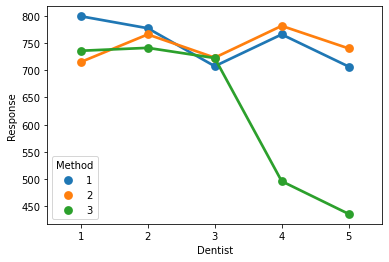

In [115]:
sns.pointplot(x=dental_alloy1.Dentist,y=dental_alloy1.Response,hue=dental_alloy1.Method,ci=None)

### Thus on the basis of visual interaction plot it seems that for alloy type 1, there is some interaction effect between the dentist and method.

### Alloy type 2

<AxesSubplot:xlabel='Dentist', ylabel='Response'>

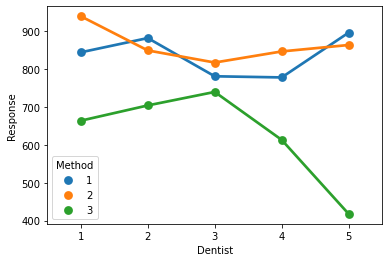

In [355]:
sns.pointplot(x=dental_alloy2.Dentist,y=dental_alloy2.Response,hue=dental_alloy2.Method,ci=None)

### Similarly  on the basis of visual interaction plot it seems that for alloy type 2, there is some interaction effect between the dentist and method.

**Thus, we can see that there is some sort of interaction between the two treatments. So, we will introduce a new term while performing the Two Way ANOVA.**

### 7.	Now consider the effect of both factors, dentist, and method, separately on each alloy. What do you conclude? Is it possible to identify which dentists are different, which methods are different, and which interaction levels are different?

### For alloy type 1

In [116]:
formula='Response ~ C(Dentist)+ C(Method)'
model=ols(formula,dental_alloy1).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,106683.688889,26670.922222,2.591255,0.051875
C(Method),2.0,148472.177778,74236.088889,7.212522,0.002211
Residual,38.0,391121.377778,10292.667836,NaN,NaN


In [117]:
formula='Response ~ C(Dentist)+ C(Method)+C(Dentist):C(Method)'
model=ols(formula,dental_alloy1).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,106683.688889,26670.922222,3.899638,0.011484
C(Method),2.0,148472.177778,74236.088889,10.854287,0.000284
C(Dentist):C(Method),8.0,185941.377778,23242.672222,3.398383,0.006793
Residual,30.0,205180.000000,6839.333333,NaN,NaN


***Due to the inclusion of the interaction effect term, we can see a slight change in the p-value of the first two treatments as compared to the Two-Way ANOVA without the interaction effect terms.And we see that the p-value of the interaction effect term of 'Dentist' and 'Method' suggests that the Null Hypothesis is rejected in this case.Thus considering the effect of interaction, the mean level of implant hardness is different when grouped among different dentists or the methods used as also there is a significant interaction effect between these two variables on the level of response received, while using alloy type 1

### For alloy type 2

In [118]:
formula='Response ~ C(Dentist)+ C(Method)'
model=ols(formula,dental_alloy2).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,56797.911111,14199.477778,0.926215,0.458933
C(Method),2.0,499640.400000,249820.200000,16.295479,0.000008
Residual,38.0,582564.488889,15330.644444,NaN,NaN


In [119]:
formula='Response ~ C(Dentist)+ C(Method)+C(Dentist):C(Method)'
model=ols(formula,dental_alloy2).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,56797.911111,14199.477778,1.106152,0.371833
C(Method),2.0,499640.400000,249820.200000,19.461218,0.000004
C(Dentist):C(Method),8.0,197459.822222,24682.477778,1.922787,0.093234
Residual,30.0,385104.666667,12836.822222,NaN,NaN


***Due to the inclusion of the interaction effect term, we can see a slight change in the p-value of the first two treatments as compared to the Two-Way ANOVA without the interaction effect terms.And we see that the p-value of the interaction effect term of  'Method' suggests that the Null Hypothesis is rejected in this case.Thus considering the effect of interaction, the mean level of implant hardness is different when grouped among different dentists or the methods used and the level of   interaction effect between the two variables i.e. dentis and method is not very significant while using alloy type 2.